<a href="https://colab.research.google.com/github/DirasanthuSwetha/CODEWAY/blob/main/gender_%26_age_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import required modules
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

# import argparse
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

In [6]:
# define the path of the face detection, age detection, and gender detection models
faceProto = "/content/opencv_face_detector.pbtxt"
faceModel = "/content/opencv_face_detector_uint8.pb"
ageProto = "/content/age_deploy.prototxt"
ageModel = "/content/age_net.caffemodel"
genderProto = "/content/gender_deploy.prototxt"
genderModel = "/content/gender_net.caffemodel"

In [14]:
# define the list of age buckets and gender that our age detector will predict.
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [11]:
# Load the face detection, age detection, and gender detection models
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)


In [18]:
padding =20

In [19]:
def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))
        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace


Saving girl1.jpg to girl1.jpg
Gender : Female, conf = 0.996
Age Output : [[1.35107375e-05 3.61037994e-04 2.35480845e-01 1.07363217e-01
  6.53517008e-01 2.32376647e-03 7.41978074e-05 8.66423128e-04]]
Age : (25-32), conf = 0.654


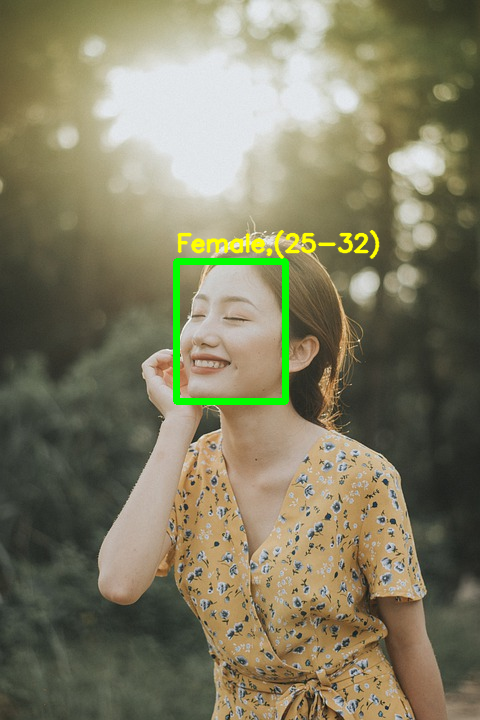

In [20]:
from google.colab import files
uploaded = files.upload()
input = cv.imread("girl1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Saving girl2.jpg to girl2.jpg
Gender : Female, conf = 0.593
Age Output : [[1.0615558e-04 1.4615909e-02 8.5622227e-01 1.1882883e-01 9.9589145e-03
  1.2238527e-04 1.3541339e-04 1.0065635e-05]]
Age : (8-12), conf = 0.856


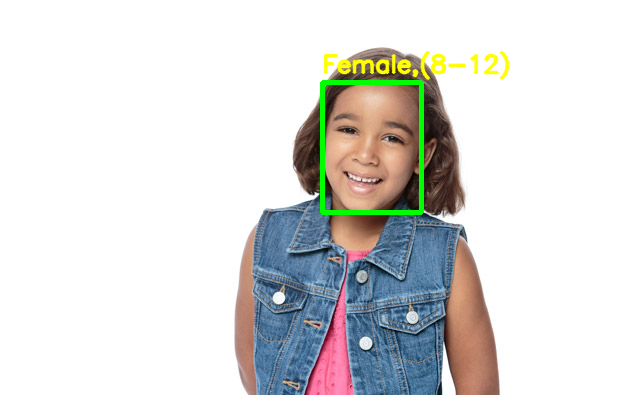

In [21]:
from google.colab import files
uploaded = files.upload()
input = cv.imread("girl2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Saving kid1.jpg to kid1.jpg
Gender : Male, conf = 1.000
Age Output : [[6.4720519e-02 9.2762262e-01 3.8744160e-03 1.5721125e-04 3.5589226e-03
  3.5552745e-05 2.4844961e-05 5.7227235e-06]]
Age : (4-6), conf = 0.928


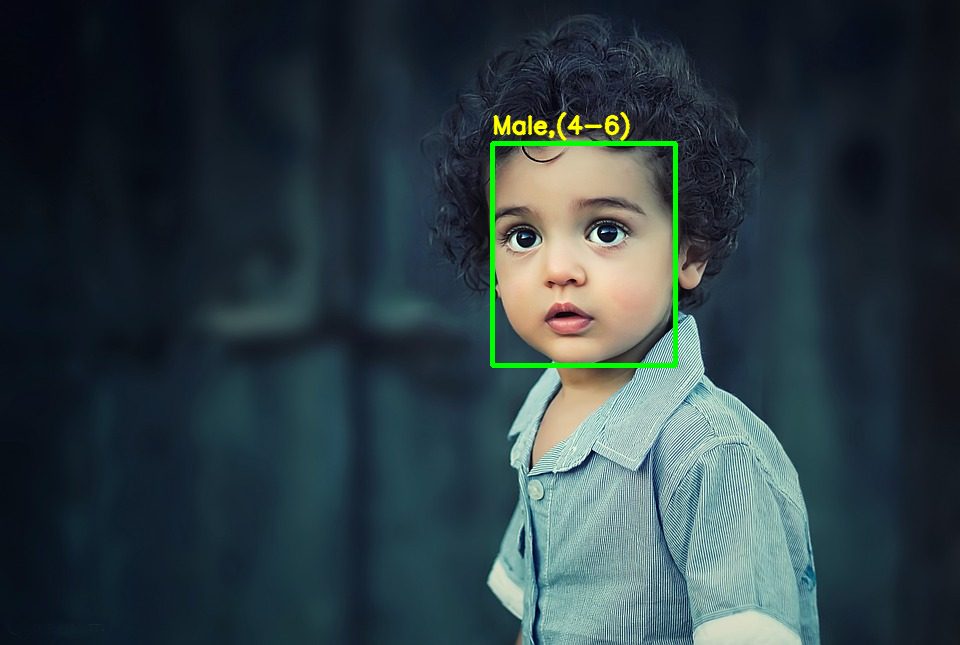

In [22]:
from google.colab import files
uploaded = files.upload()
input = cv.imread("kid1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Saving man1.jpg to man1.jpg
Gender : Male, conf = 0.997
Age Output : [[3.4828612e-05 7.1957393e-06 1.6768652e-04 1.0404468e-04 1.0569712e-01
  7.7629477e-01 9.8762341e-02 1.8931998e-02]]
Age : (38-43), conf = 0.776


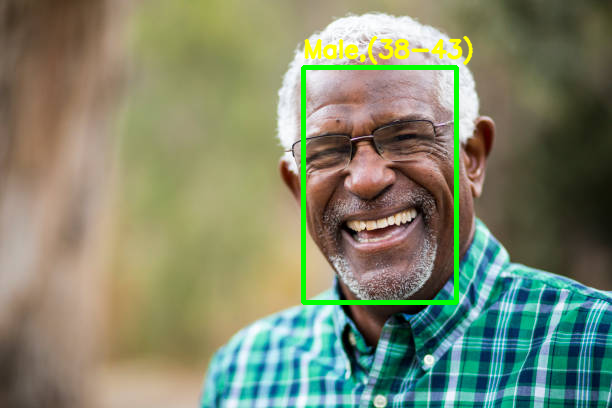

In [23]:
from google.colab import files
uploaded = files.upload()
input = cv.imread("man1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)